### K-Means 

Algoritmo que agrupoa las observaciones en función de su similitud: lo parecidas o diferentes que son sus variables, para lo que utiliza una métrica de distancia.

Inicialmente, se asignan aleatoriamente las observaciones a cada cluster y se calculan los centros o se eligen centros aleatorios y se asignan las observacuones al más cercano. En cada iteración se recalculan los centros y se vuelven a asginar las obsercaciones al cluster más cercano.

El algoritmo minimza la distancia intragrupo a lo largo de los distintos grupos.

Se pueden asignar nuevas observaciones al cluster más cercano (se podrían recalcular los clusters, o no).

Restricciones:

* Sólo puede utilizar variables numéricas.
* El número de agrupaciones se tiene que definir a priori 
* Problemas de inicialización y terminación 
* Sensible a outliers (ayuda a detectarlos)
* Asume que los grupos son esferas

Parámetros:

* n_clusters: número de grupos
* n_init: número de iteraciones máximas (para evitar que no termine) 

#### Importar Paquetes

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs # para simular datos
from sklearn.cluster import KMeans # algorimto Kmeans
from scipy.spatial.distance import cdist # para calcular la distancia dentro de los clusters
import numpy as np

#### Simulación de datos 

Se puede utilziar la función make_blobs o se pueden generar de manera más "manual" con la función radom.normal. Utilizaremos la función make_blobs

In [49]:
# Simulamos los datos: 500 observaciones, 2 variables, 4 clusters (se indica a cuál pertenecen)

data = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1.8,random_state=123456789)
data

(array([[-3.85278660e+00,  4.17153480e+00],
        [ 5.83318690e+00, -6.78969250e+00],
        [ 7.44702743e-01,  5.63665963e+00],
        [-3.62011082e+00,  4.74062038e+00],
        [ 7.94328255e+00, -8.08452786e+00],
        [ 1.01507549e+01, -7.00778580e+00],
        [ 7.44566830e+00, -5.49197183e+00],
        [-1.27551713e-01,  8.56289584e-01],
        [-6.01005737e+00,  6.43667314e+00],
        [ 3.97152738e-01,  6.28197114e+00],
        [ 2.74730883e-01,  1.17830218e-01],
        [-1.54322586e+00,  4.34672818e+00],
        [ 8.78079552e-01,  1.93227722e+00],
        [ 8.21684583e+00, -5.66795026e+00],
        [-1.81933354e+00,  7.09522220e+00],
        [ 1.07160221e+01, -6.38738780e+00],
        [-5.67809288e+00,  3.46889595e+00],
        [-8.82815774e+00,  5.60370496e+00],
        [-4.65902914e+00,  3.63093740e+00],
        [ 9.67240597e+00, -6.27611822e+00],
        [-5.72586352e-01,  2.65346564e-01],
        [-7.88531750e-01, -8.20482210e-01],
        [-1.00636345e+00,  3.360

In [50]:
data[0].shape

(500, 2)

In [51]:
data[1].shape

(500,)

In [52]:
datos_simulados= data[0]
cluster_simulado=data[1]

#### Visualización de los datos

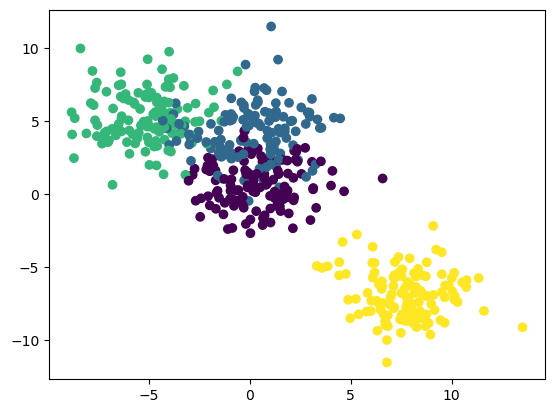

In [54]:
plt.scatter(datos_simulados[:,0], datos_simulados[:,1] , c=cluster_simulado)
plt.show()

#### Construcción de los Clusters

Definimos el algoritmo (4 clusters) y los ajustamos a los datos.

In [56]:
k_means = KMeans(n_clusters=4,n_init=50)
k_means.fit(datos_simulados)

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init=50)

Se obtienen los  centros de los clusters

In [58]:
k_means.cluster_centers_

array([[ 7.68923569, -6.88074205],
       [ 0.56739863,  4.94992349],
       [-5.12863728,  5.18351866],
       [ 0.2959151 ,  0.71598326]])

Se obtiene el cluster al que se asignaría cada punto. El objetivo no es compararlo con el cluster original, porque no existía necesariamente, pero hemos generado los puntos a partir de cuatro clusters teorícos, por lo que sí que se podrían comparar.

In [71]:
k_means.labels_

array([2, 0, 1, 2, 0, 0, 0, 3, 2, 1, 3, 1, 3, 0, 1, 0, 2, 2, 2, 0, 3, 3,
       1, 0, 3, 1, 3, 0, 0, 1, 2, 2, 3, 2, 2, 2, 0, 1, 1, 3, 2, 3, 2, 2,
       3, 3, 2, 2, 0, 2, 3, 2, 2, 1, 2, 3, 2, 0, 2, 3, 1, 0, 1, 3, 0, 3,
       1, 2, 1, 0, 2, 2, 1, 3, 3, 1, 2, 1, 0, 2, 3, 2, 3, 0, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 0, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3,
       2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 0, 2, 0, 1, 0,
       1, 3, 3, 2, 0, 0, 0, 1, 2, 3, 3, 0, 2, 3, 3, 3, 2, 1, 2, 1, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 0, 2, 2, 0, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       2, 3, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 3, 2, 2, 0, 3, 2, 3, 0, 0,
       2, 3, 0, 1, 0, 0, 0, 3, 1, 3, 0, 2, 3, 3, 0, 3, 0, 1, 2, 0, 1, 1,
       2, 3, 3, 1, 3, 2, 3, 3, 2, 0, 3, 3, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2,
       2, 2, 1, 0, 1, 3, 0, 0, 3, 0, 1, 2, 0, 3, 2, 3, 0, 3, 1, 0, 2, 3,
       3, 2, 3, 3, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1,

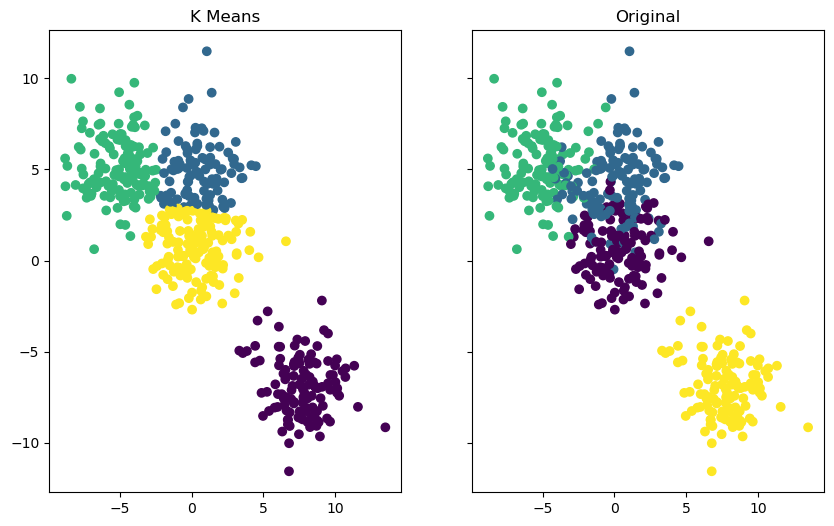

In [75]:
f, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(datos_simulados[:,0],datos_simulados[:,1], c =k_means.labels_)
ax2.set_title("Original")
ax2.scatter(datos_simulados[:,0],datos_simulados[:,1], c = cluster_simulado)


Se pueden obtener las distancias medias entre grupos para distintos números de clusters, y enriquecer así la elección "a priori" del número de clusters.

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

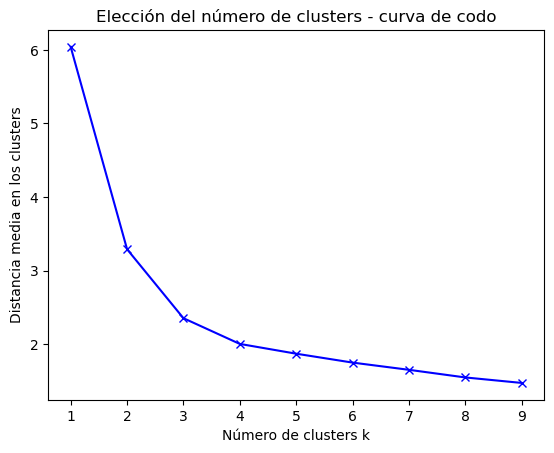

In [83]:
clusters = range(1,10)

desviaciones_medias=[]

for k in clusters:
    model =KMeans(n_clusters=k,n_init=25)
    model.fit(datos_simulados)
    prediction = model.predict(datos_simulados)
    desviaciones_medias.append(sum(np.min(cdist(datos_simulados,model.cluster_centers_,"euclidean"),axis=1))/datos_simulados.shape[0])
    
plt.cla()
plt.plot(clusters,desviaciones_medias,"bx-")
plt.xlabel('Número de clusters k')
plt.ylabel('Distancia media en los clusters')
plt.title('Elección del número de clusters - curva de codo')
plt.show()

Se repite la generación de agrupaciones per con 2 o 3 clusters, que parecen también buenas elecciones, pues son los dos grupos donde coinciden mas la distancia y el número de clusters en el gráfico.

Para 2 clusters:

In [93]:
model = KMeans(n_clusters=2,n_init=50)
model.fit(data[0])

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, n_init=50)

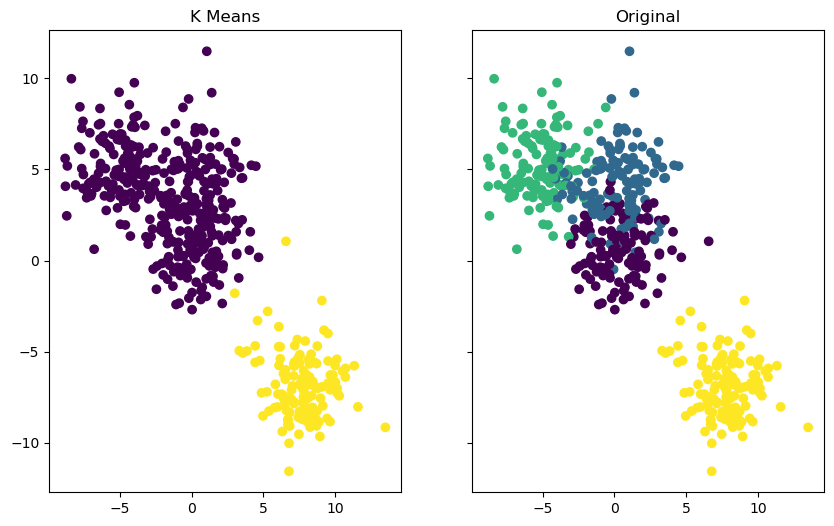

In [94]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=model.labels_)
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.show()

Para 3 Clusters

In [98]:
model = KMeans(n_clusters=3,n_init=50)
model.fit(data[0])

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=50)

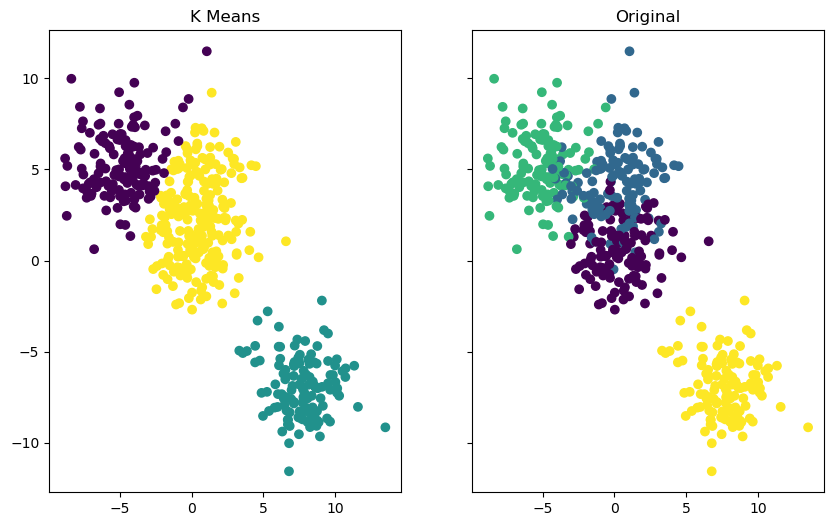

In [100]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=model.labels_)
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.show()